In [8]:
# import the necessay libraries and the dataset with which we shall play!
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn import datasets
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, auc,roc_curve
from sklearn.model_selection import KFold, cross_val_score

In [2]:
# store the data itself and the target seperatly
digits = datasets.load_digits()
X=digits.data
y=digits.target

In [3]:
# get the data with respect to the choice of lables {8, 9}
def getData(X, y):
    index = []
    for i in range(len(y)):
        if y[i] != 8 and y[i] != 9:
            index.append(i)

    y = np.delete(y, index)
    X = np.delete(X, index, axis=0)
    return X, y

X, y = getData(X, y)

In [4]:
# keep truck on the labels and their indices
indice = {}
for i in range(len(y)):
        if y[i] == 8 or y[i] == 9:
            indice[i] = y[i]

indice_8 = [key  for (key, value) in indice.items() if value == 8]
indice_9 = [key  for (key, value) in indice.items() if value == 9]

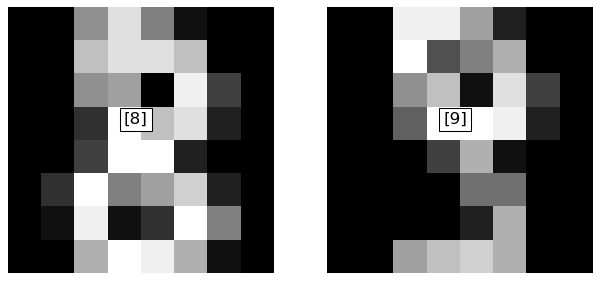

In [56]:
# set the stage for dispalying a couple of images
fig = plt.figure(figsize =(10, 7), dpi = 75.5, facecolor = 'white')
ax = fig.add_subplot(121)
ay = fig.add_subplot(122)

# randomly selectin' and displayin' an element of each label    
obs1 = X[random.sample(indice_8, 1),:]
obs2 = X[random.sample(indice_9, 1),:]
image1 = np.array(obs1, dtype='uint8').reshape(8,8)
image2 = np.array(obs2, dtype='uint8').reshape(8,8)
ax.imshow(image1, cmap='gray')
ax.axis("off")
ax.annotate(y[random.sample(indice_8, 1)],(3,3),bbox={'facecolor':'white'}, fontsize=16)
ay.imshow(image2, cmap='gray')
ay.axis("off")
ay.imshow(image2, cmap='gray')
ay.annotate(y[random.sample(indice_9, 1)],(3,3),bbox={'facecolor':'white'}, fontsize=16)
plt.show()

In [5]:
# disarrange the rows order in the dataset
nrow, ncol = X.shape
p = np.arange(nrow, dtype = int)
random.seed(0)  #to be able to regenerate the same data multiple times
random.shuffle(p)
X, y = X[p], y[p]

In [6]:
# Split the dataset for training and testing
n = int(2*nrow/3)  
X_train = X[:n]  #two-third for training
X_test = X[n:]
y_train = y[:n]
y_test = y[n:]

# Naive Bayes classifier

In [7]:
# implementing 
from sklearn.naive_bayes import GaussianNB
naiveBayes = GaussianNB() 
naiveBayes.fit(X_train, y_train)
y_pred = naiveBayes.predict(X_test)

In [8]:
# score and confusion matrix
score = sum(y_pred == y_test)/len(y_pred)
print("The precision of the NaiveBayes model is {}%".format(score * 100))
cm = confusion_matrix(y_test, y_pred, labels=[8, 9])
print(cm)

The precision of the NaiveBayes model is 85.59322033898306%
[[65  2]
 [15 36]]


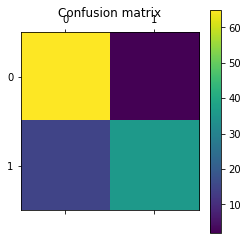

In [10]:
# plot the confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.show()

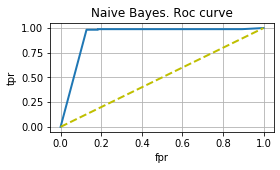

In [11]:
#Compute the area under the ROC curve
from sklearn import metrics
y_proba = naiveBayes.predict_proba(X)[:, 0]
fpr, tpr, thresholds = metrics.roc_curve(y, y_proba, pos_label=8)
figure = plt.figure(figsize=(4,2))
plt.plot(fpr,tpr, linewidth=2)
plt.title('Naive Bayes. Roc curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot(tpr,tpr,"y--", linewidth=2)
plt.grid(linestyle='solid')
plt.show()

[[57  2]
 [16 43]]
The precision of the NaiveBayes model is 84.7457627118644%
[[56  0]
 [12 50]]
The precision of the NaiveBayes model is 89.83050847457628%
[[59  0]
 [ 7 52]]
The precision of the NaiveBayes model is 94.0677966101695%
NBayes score = 0.8954802259887006
NBayes precision score = 0.8327635745041063
NBayes recall score = 0.9887005649717514


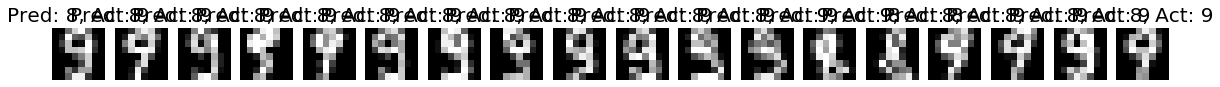

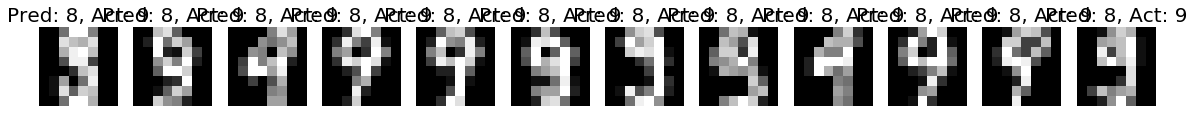

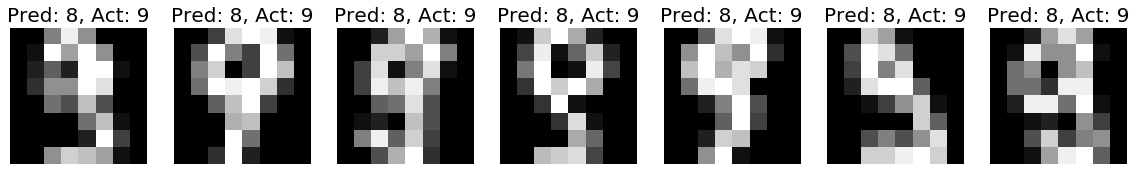

In [62]:
# Kfold cross validation with Naive Bayes Classifier
kf = KFold(n_splits=3, shuffle = True, random_state = 0)
naiveBayes = GaussianNB() 
scores = []
pres_score = []
recal_score = []
for train, test in kf.split(X):
    naiveBayes.fit(X[train], y[train])
    y_pred = naiveBayes.predict(X[test])
    
    # find the misclassified labels and get their indexes
    index = 0
    misclassifiedIndexes = []
    for label, predict in zip(y[test], y_pred):
        if label != predict: 
            misclassifiedIndexes.append(index)
        index +=1
    plt.figure(figsize=(20,4))
    # plot those which were wrongly classified by the model
    for plotIndex, badIndex in enumerate(misclassifiedIndexes[:]):
        plt.subplot(1, len(misclassifiedIndexes), plotIndex + 1)
        plt.axis("off")
        plt.imshow(np.reshape(X[test][badIndex], (8,8)), cmap=plt.cm.gray)
        plt.title('Pred: {}, Act: {}'.format(y_pred[badIndex], y[test][badIndex]), fontsize = 20)
    cm = metrics.confusion_matrix(y[test], y_pred)
    print(cm)
    score = sum(y_pred == y[test])/len(y_pred)
    scores.append(score)
    pres_score.append(precision_score(y[test], y_pred, pos_label=8))
    recal_score.append(recall_score(y[test], y_pred, pos_label=8))
    scores.append(score)
    print("The precision of the NaiveBayes model is {}%".format(score * 100))   
print('NBayes score =', np.mean(scores))
print('NBayes precision score =', np.mean(pres_score))
print('NBayes recall score =', np.mean(recal_score))

# Linear discriminant analysis

[[59  0]
 [ 3 56]]
The precision of the LDA model is 97.45762711864407%
[[56  0]
 [ 1 61]]
The precision of the LDA model is 99.15254237288136%
[[57  2]
 [ 0 59]]
The precision of the LDA model is 98.30508474576271%
LDA score = 0.9830508474576272
LDA precision score = 0.9780230145255612
LDA recall score = 0.9887005649717514


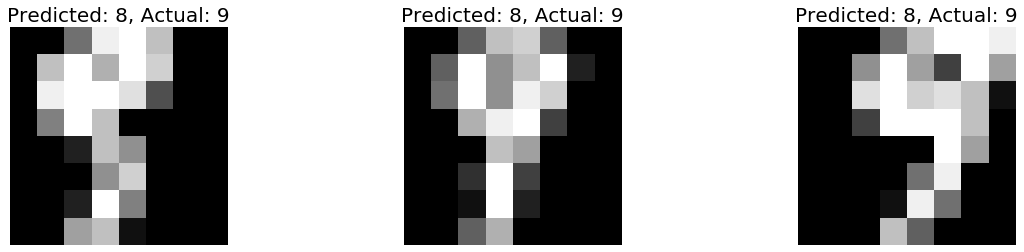

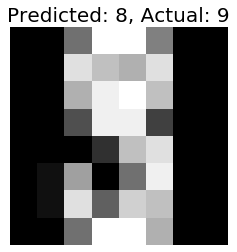

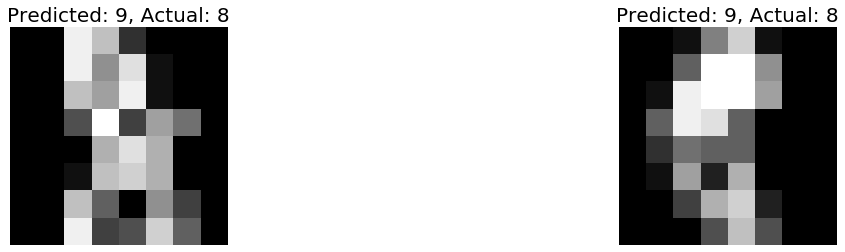

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Lda = LinearDiscriminantAnalysis()
kf = KFold(n_splits=3, shuffle = True, random_state=0)
scores = []
pres_score = []
recal_score = []
for train, test in kf.split(X):
    Lda.fit(X[train], y[train])
    y_pred = Lda.predict(X[test])
    
    # find the misclassified labels and get their indexes
    index = 0
    misclassifiedIndexes = []
    for label, predict in zip(y[test], y_pred):
        if label != predict: 
            misclassifiedIndexes.append(index)
        index +=1
    # plot those which were wrongly classified by the model
    plt.figure(figsize=(20,4))
    for plotIndex, badIndex in enumerate(misclassifiedIndexes[:]):
        plt.subplot(1, len(misclassifiedIndexes), plotIndex + 1)
        plt.axis("off")
        plt.imshow(np.reshape(X[test][badIndex], (8,8)), cmap=plt.cm.gray)
        plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], y[test][badIndex]), fontsize = 20)
    cm = metrics.confusion_matrix(y[test], y_pred)
    print(cm)
    score = sum(y_pred == y[test])/len(y_pred)
    pres_score.append(precision_score(y[test], y_pred, pos_label=8))
    recal_score.append(recall_score(y[test], y_pred, pos_label=8))
    scores.append(score)
    print("The precision of the LDA model is {}%".format(score * 100))   
print('LDA score =', np.mean(scores))
print('LDA precision score =', np.mean(pres_score))
print('LDA recall score =', np.mean(recal_score))

# Logistic regression

[[57  2]
 [ 2 57]]
The precision of the LRG model is 96.61016949152543%
[[56  0]
 [ 1 61]]
The precision of the LRG model is 99.15254237288136%
[[57  2]
 [ 0 59]]
The precision of the LRG model is 98.30508474576271%
LogR score =98.023%, 
LogR precision score =98.285%, 
LogR recall score =97.740%, 


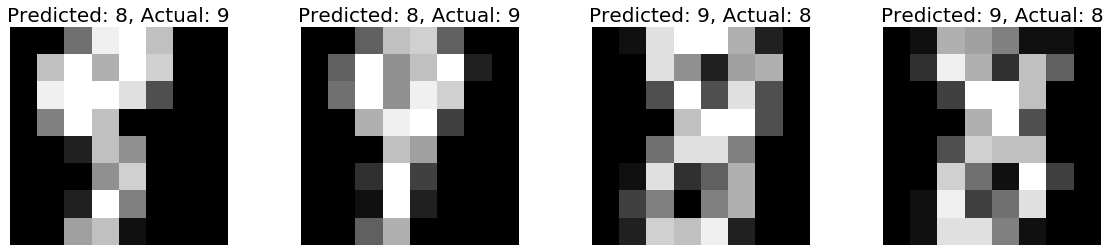

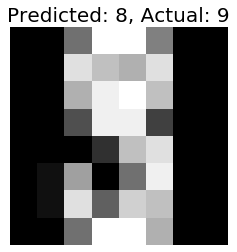

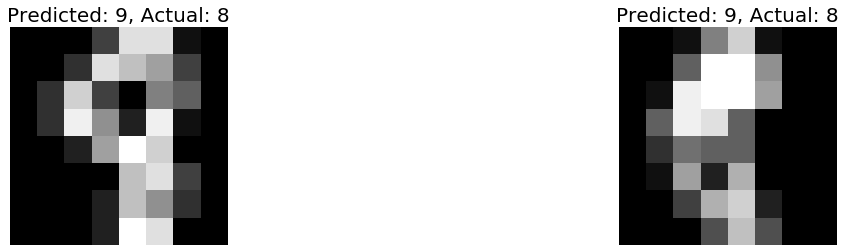

In [19]:
from sklearn.linear_model import LogisticRegression
logisticregre=LogisticRegression(C=1e5)
kf = KFold(n_splits=3, shuffle = True, random_state = 0)
scores = []
pres_score = []
recal_score = []
for train, test in kf.split(X): 
    logisticregre.fit(X[train], y[train])
    y_pred = logisticregre.predict(X[test])
    index = 0
    misclassifiedIndexes = []
    for label, predict in zip(y[test], y_pred):
        if label != predict: 
            misclassifiedIndexes.append(index)
        index +=1
    plt.figure(figsize=(20,4))
    for plotIndex, badIndex in enumerate(misclassifiedIndexes[:]):
        plt.subplot(1, len(misclassifiedIndexes), plotIndex + 1)
        plt.axis("off")
        plt.imshow(np.reshape(X[test][badIndex], (8,8)), cmap=plt.cm.gray)
        plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], y[test][badIndex]), fontsize = 20)
        
    cm = confusion_matrix(y[test], y_pred)
    print(cm)
    score = sum(y_pred == y[test])/len(y_pred)
    pres_score.append(precision_score(y[test], y_pred, pos_label=8))
    recal_score.append(recall_score(y[test], y_pred, pos_label=8))
    scores.append(score)
    scores.append(score)
    print("The precision of the LRG model is {}%".format(score * 100))  

print('LogR score =%.3f%%, ' % (np.mean(scores)*100))
print('LogR precision score =%.3f%%, ' % (np.mean(pres_score)*100))
print('LogR recall score =%.3f%%, ' % (np.mean(recal_score)*100))


# KNN model

k=1, accuracy=98.87%, precision =98.31%, recall =99.40%, 
k=3, accuracy=99.15%, precision =98.30%, recall =100.00%, 
k=5, accuracy=99.15%, precision =98.30%, recall =100.00%, 
k=7, accuracy=98.59%, precision =97.76%, recall =99.44%, 


<Figure size 1440x288 with 0 Axes>

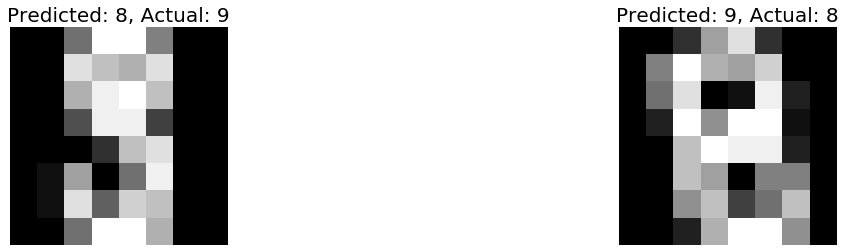

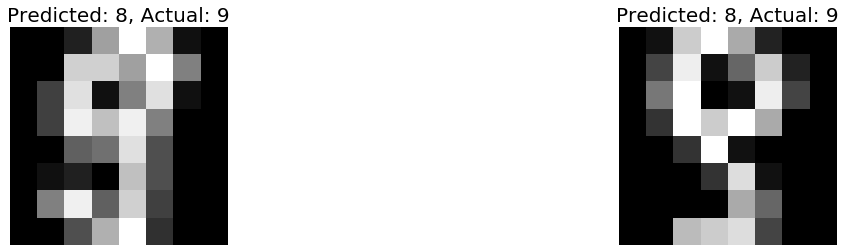

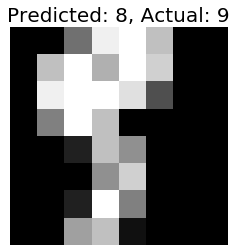

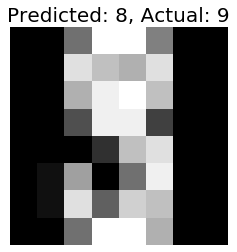

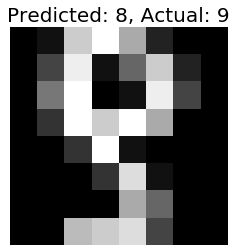

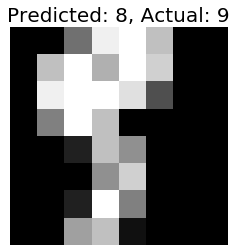

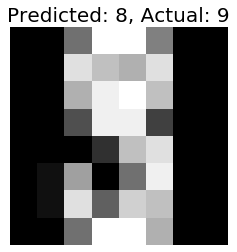

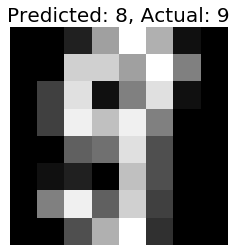

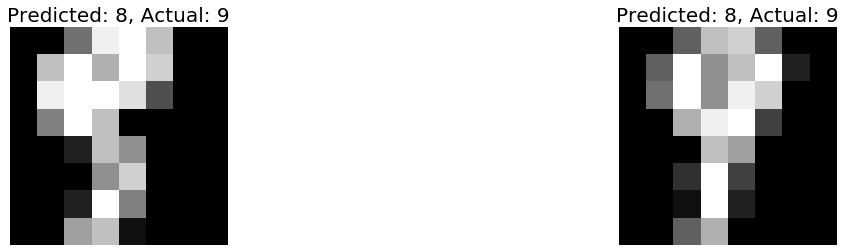

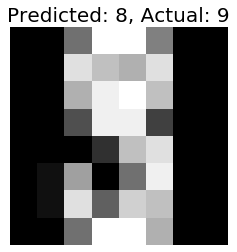

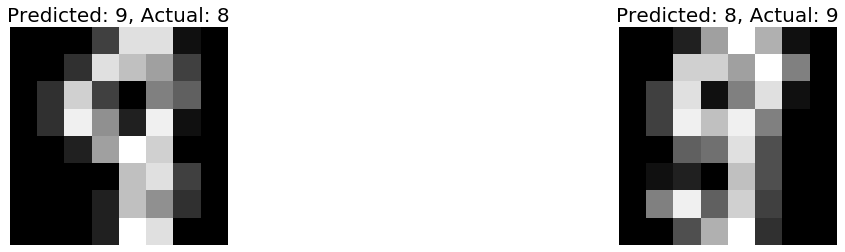

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True, random_state=0)
accuracy = {}
precision = {}
recall = {}
kValues = [1, 3, 5, 7]
for k in kValues:
    scores = []
    pres_score = []
    recal_score = []    
    KnnModel = KNeighborsClassifier(k)
    for train, test in kf.split(X):
        KnnModel.fit(X[train], y[train])
        y_pred = KnnModel.predict(X[test])
        
        # find the misclassified labels and get their indexes
        index = 0
        misclassifiedIndexes = []
        for label, predict in zip(y[test], y_pred):
            if label != predict: 
                misclassifiedIndexes.append(index)
            index +=1
            
        # plot those which were wrongly classified by the model for each value of k
        plt.figure(figsize=(20,4))
        for plotIndex, badIndex in enumerate(misclassifiedIndexes[:]):
            plt.subplot(1, len(misclassifiedIndexes), plotIndex + 1)
            plt.axis("off")
            plt.imshow(np.reshape(X[test][badIndex], (8,8)), cmap=plt.cm.gray)
            plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], y[test][badIndex]), fontsize = 20)
        score = KnnModel.score(X[test], y[test])
        scores.append(score)
        pres_score.append(precision_score(y[test], y_pred, pos_label=8))
        recal_score.append(recall_score(y[test], y_pred, pos_label=8))
        
    print("k=%d, accuracy=%.2f%%, precision =%.2f%%, recall =%.2f%%, " % (k, np.mean(scores) * 100,\
                                                np.mean(pres_score) * 100, np.mean(recal_score) * 100))
          
    

|--- feature_42 <= 4.50
|   |--- feature_43 <= 8.50
|   |   |--- feature_36 <= 15.50
|   |   |   |--- class: 9
|   |   |--- feature_36 >  15.50
|   |   |   |--- feature_46 <= 0.50
|   |   |   |   |--- class: 9
|   |   |   |--- feature_46 >  0.50
|   |   |   |   |--- feature_30 <= 5.00
|   |   |   |   |   |--- class: 8
|   |   |   |   |--- feature_30 >  5.00
|   |   |   |   |   |--- class: 9
|   |--- feature_43 >  8.50
|   |   |--- feature_60 <= 3.00
|   |   |   |--- class: 9
|   |   |--- feature_60 >  3.00
|   |   |   |--- class: 8
|--- feature_42 >  4.50
|   |--- feature_38 <= 4.00
|   |   |--- feature_35 <= 4.50
|   |   |   |--- class: 9
|   |   |--- feature_35 >  4.50
|   |   |   |--- class: 8
|   |--- feature_38 >  4.00
|   |   |--- class: 9

[[59  0]
 [ 1 58]]
The precision of the Tree model is 99.15254237288136%
|--- feature_42 <= 4.50
|   |--- feature_43 <= 7.50
|   |   |--- feature_28 <= 4.50
|   |   |   |--- feature_6 <= 0.50
|   |   |   |   |--- class: 9
|   |   |   |--- feat

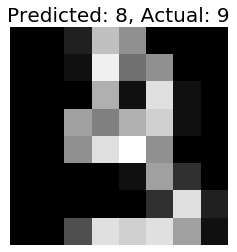

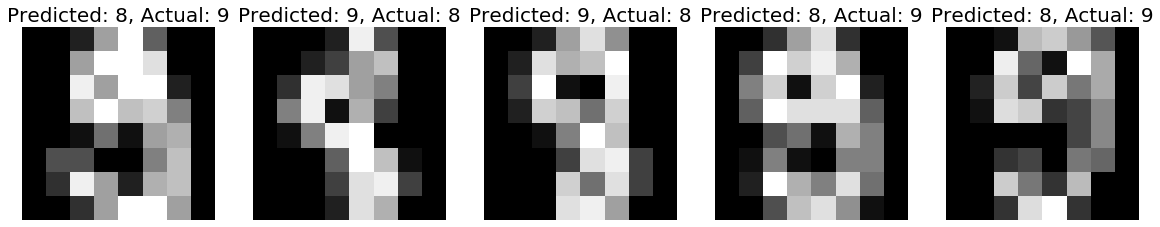

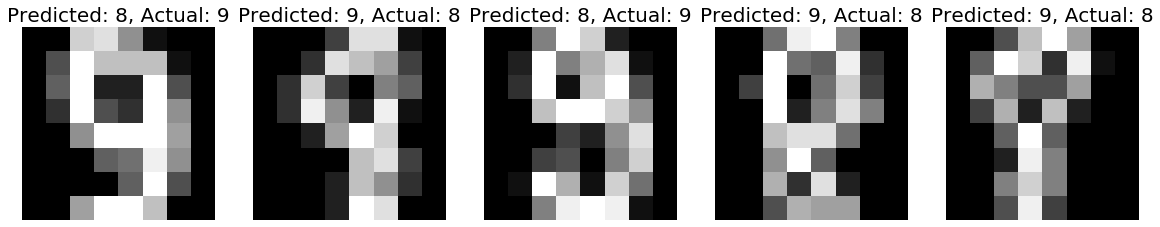

In [31]:
# Decision Tree
from sklearn import tree
from sklearn.tree import export_text
tree = tree.DecisionTreeClassifier()
kf = KFold(n_splits=3, shuffle = True, random_state = 0)
scores = []
pres_score = []
recal_score = []
for train, test in kf.split(X): 
    treefit = tree.fit(X[train], y[train])
    y_pred = treefit.predict(X[test])
    r = export_text(treefit)
    print(r)
    
    # find the misclassified labels and get their indexes
    index = 0
    misclassifiedIndexes = []
    for label, predict in zip(y[test], y_pred):
        if label != predict: 
            misclassifiedIndexes.append(index)
        index +=1
        
    plt.figure(figsize=(20,4))
    for plotIndex, badIndex in enumerate(misclassifiedIndexes[:]):
        plt.subplot(1, len(misclassifiedIndexes), plotIndex + 1)
        plt.axis("off")
        plt.imshow(np.reshape(X[test][badIndex], (8,8)), cmap=plt.cm.gray)
        plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], y[test][badIndex]), fontsize = 20)
        
    cm = confusion_matrix(y[test], y_pred)
    print(cm)
    score = sum(y_pred == y[test])/len(y_pred)
    pres_score.append(precision_score(y[test], y_pred, pos_label=8))
    recal_score.append(recall_score(y[test], y_pred, pos_label=8))
    scores.append(score)
    scores.append(score)
    print("The precision of the Tree model is {}%".format(score * 100))  

print('Tree score =%.3f%%, ' % (np.mean(scores)*100))
print('Tree precision score =%.3f%%, ' % (np.mean(pres_score)*100))
print('Tree recall score =%.3f%%, ' % (np.mean(recal_score)*100))


# Bootstrap Aggregation Classifier


In [41]:
#Bagging for Naive Bayes
from sklearn.ensemble import BaggingClassifier  
kfold = KFold(n_splits = 3, shuffle = True, random_state = 0)   
# bagging classifier 
model = BaggingClassifier(base_estimator = naiveBayes, 
                          n_estimators = 10, 
                          random_state = 0).fit(X, y)
  
results = cross_val_score(model, X, y, cv = kfold) 
print("accuracy :") 
print("{0:.3f}%".format(np.mean(results) *100))

accuracy :
90.678%


In [42]:
#Bagging for DecisionTree 
kfold = KFold(n_splits = 3, shuffle = True, random_state = 0)   
# bagging classifier 
model = BaggingClassifier(random_state = 0).fit(X, y)
  
results = cross_val_score(model, X, y, cv = kfold) 
print("accuracy :") 
print("{0:.3f}%".format(np.mean(results) *100))

accuracy :
96.610%


# Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier as RandFR
kfold = KFold(n_splits = 3, shuffle = True, random_state = 0)   
# create an istance of the model in its base version
RandFR_model = RandFR()
# train the model
RandFR_model.fit(X_train, y_train)
# evaluate the model
results = cross_val_score(RandFR_model, X, y, cv = kfold) 
print("accuracy :") 
print("{0:.3f}%".format(np.mean(results) *100))
#print("The RandFR accuracy = ", accuracy_score(y_test, y_pred))

accuracy :
98.305%


In [14]:
#Hyperparameter Tuning of the RandFR model
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in the forest
n_estimators = [50, 150, 200, 300, 400]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 21, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7]
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

In [15]:
# create the base model to tune
RandFR_model = RandFR()
# Walk all paramters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
RandFR_search = RandomizedSearchCV(estimator = RandFR_model, 
                                   param_distributions = param_grid, 
                                   n_iter = 20, cv = 2, verbose=2,
                                   random_state=42, n_jobs = -1)
# train the search model 
RandFR_search.fit(X_train, y_train)

RandFR_search.best_params_

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    5.7s finished


{'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 21}

In [16]:
# get the best version
best_RandFR = RandFR_search.best_estimator_
del RandFR_search

# train the model 
best_RandFR.fit(X_train, y_train)

# evaluate the model
results = cross_val_score(best_RandFR, X, y, cv = kfold) 
print("accuracy :") 
print("{0:.3f}%".format(np.mean(results) *100))
#print("The RandFR accuracy = ", accuracy_score(y_test, y_pred))

accuracy :
98.588%


We observe a slight improvement in the accuracy score compared to the model in its default state

In [21]:
y_prd = best_RandFR.predict(X_test)
sum(y_prd != y_test)

0

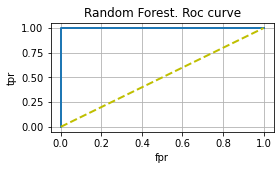

In [22]:
#Compute the area under the ROC curve
from sklearn import metrics
y_proba = best_RandFR.predict_proba(X)[:, 0]
fpr, tpr, thresholds = metrics.roc_curve(y, y_proba, pos_label=8)
figure = plt.figure(figsize=(4,2))
plt.plot(fpr,tpr, linewidth=2)
plt.title('Random Forest. Roc curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot(tpr,tpr,"y--", linewidth=2)
plt.grid(linestyle='solid')
plt.show()

# Gradient Boosting Classifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier as GradBoost
# set up the param grid
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)

# create the base model to tune
GradBoost_model = GradBoost(n_iter_no_change = 3)
# Walk all paramters, using 2 foldS cross validation, 
# search across 20 different combinations, and use all available cores
GradBoost_search = RandomizedSearchCV(estimator = GradBoost_model, 
                                   param_distributions = param_grid, 
                                   n_iter = 20, cv = 2, verbose=2,
                                   random_state=42, n_jobs = -1)

# train the search model
GradBoost_search.fit(X_train, y_train)

print("Best: with %s" % (GradBoost_search.best_params_))

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s


Best: with {'n_estimators': 300, 'learning_rate': 0.1}


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.4s finished


In [26]:
# get the best version
best_GradBoost = GradBoost_search.best_estimator_
del GradBoost_search

# train the model 
best_GradBoost.fit(X_train, y_train)

# evaluate the model
results = cross_val_score(best_GradBoost, X, y, cv = kfold) 
print("accuracy :") 
print("{0:.3f}%".format(np.mean(results) *100))

accuracy :
98.023%


In [27]:
y_prd = best_GradBoost.predict(X_test)
sum(y_prd != y_test)

2

# logistic_reg 0.984 (0.020)
# KNN 0.989 (0.016)
# DecisionTree 0.970 (0.023)
# Bayes 0.898 (0.037)
# RFR 0.989 (0.017)
# GradBoost 0.980 (0.021)
# stacking 0.993 (0.012)


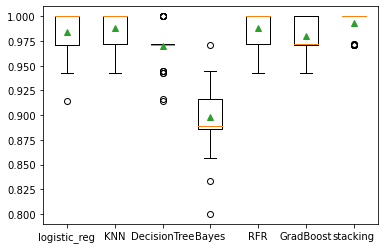

In [35]:
# make a prediction with a stacking ensemble
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level = list()
    level.append(('logistic_reg', LogisticRegression()))
    level.append(('KNN', KNeighborsClassifier()))
    level.append(('DecisionTree', DecisionTreeClassifier()))
    level.append(('Bayes', GaussianNB()))
    level.append(('RFR', best_RandFR))
    level.append(('GradBoost', best_GradBoost))
    # define meta learner model
    level0 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level, final_estimator=level0, cv=5)
    return model

# get the list of the models to evaluate
def get_models():
    models = dict()
    models['logistic_reg'] = LogisticRegression()
    models['KNN'] = KNeighborsClassifier()
    models['DecisionTree'] = DecisionTreeClassifier()
    models['Bayes'] = GaussianNB()
    models['RFR'] = best_RandFR
    models['GradBoost'] = best_GradBoost
    models['stacking'] = get_stacking()
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state = 0)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('# %s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

We can clearly see that the stacking technics on those algorithms give a very satisfying results in terms of accuracy and the variance.